In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import sstats.sigp as sigp

In [2]:
ds_low = xr.open_dataset('/Users/zcaspar/codes/mit4320/ds_lf.nc')

In [4]:
ds_autocov = sigp.correlate(ds_low.u_bar,ds_low.u_bar,biased=True)

In [5]:
ds = ds_autocov.compute()

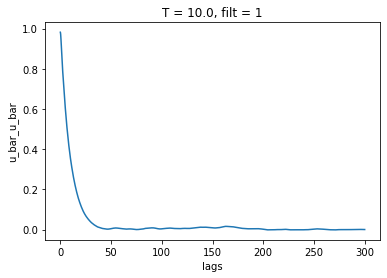

In [6]:
ds.isel(filt=1,T=1).mean('draw').plot()

In [7]:
ds_hf = np.exp(1j*2*2*np.pi*ds_low.time)

(200.0, 150.0)

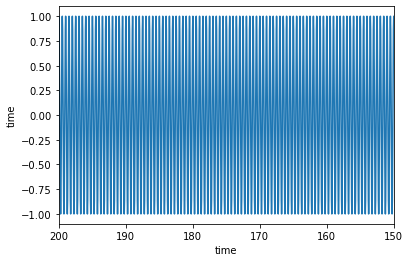

In [8]:
ds_hf.real.plot()
plt.xlim((200,150))

In [12]:
_ = ds_hf.real.values

In [16]:
n = _.size
_w = np.arange(1,n+1)
w = np.hstack([_w, _w[-2::-1]])

In [23]:
_w.size

7200

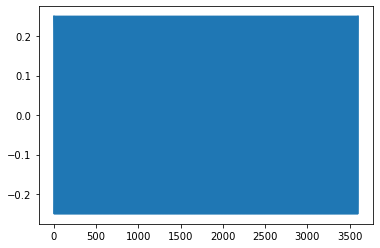

In [28]:
plt.plot(np.correlate(_[:n//2],_[:],mode='valid')/n)

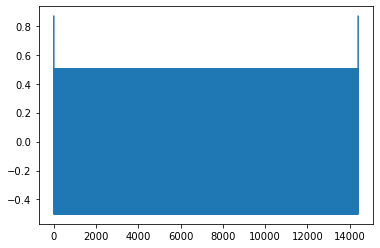

In [38]:
plt.plot(np.correlate(_,_,mode='full')/w)

In [31]:
ds_hf.real

<xarray.DataArray 'time' (time: 7200)>
array([ 1.00000000e+00,  8.66025404e-01,  5.00000000e-01, ...,
       -3.68940988e-13,  5.00000000e-01,  8.66025404e-01])
Coordinates:
  * time     (time) float64 0.0 0.04167 0.08333 0.125 ... 299.9 299.9 300.0

In [9]:
dt = 1/24
lags = np.arange(0,ds_low.time.size,dt)
ds_autocov_hf = sigp.correlate(ds_hf.real,ds_hf.real,biased=False).compute()

(250.0, 299.0)

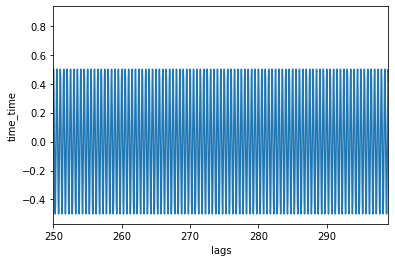

In [13]:
ds_autocov_hf.plot()
plt.xlim(250,299)